     Month  Monthly beer production
0  1956-01                     93.2
1  1956-02                     96.0
2  1956-03                     95.2
3  1956-04                     77.1
4  1956-05                     70.9


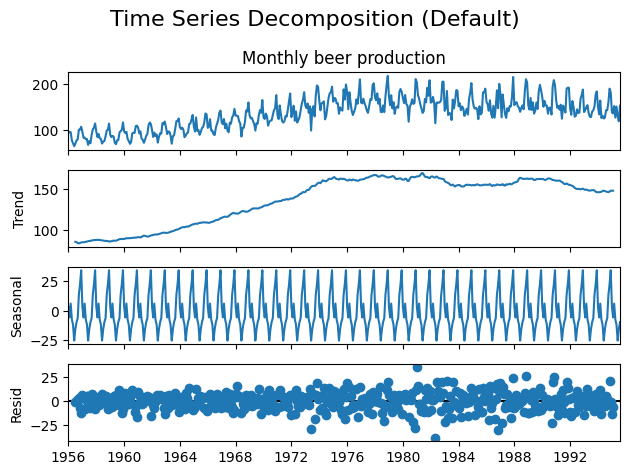

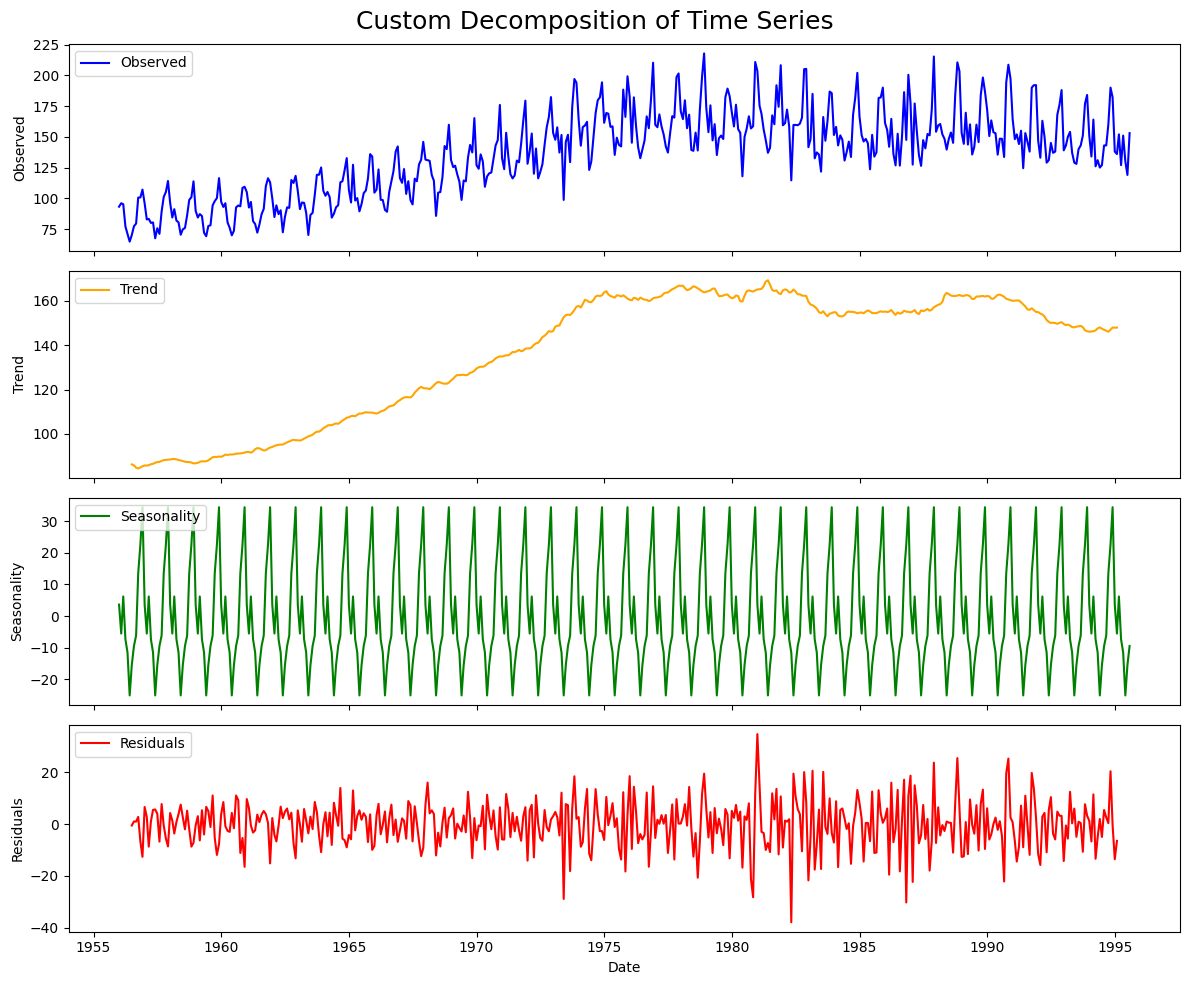

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('/content/monthly-beer.csv')

# View first few rows
print(data.head())

# Convert 'Month' to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Month' as index
data.set_index('Month', inplace=True)

# Decompose the time series
result = seasonal_decompose(data.iloc[:, 0], model='additive', period=12)

# Plot the decomposition (default plot)
result.plot()
plt.suptitle('Time Series Decomposition (Default)', fontsize=16)
plt.tight_layout()
plt.show()

# ---------- Custom Graphs ----------

# Create a custom figure
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
axs[0].plot(result.observed, label='Observed', color='blue')
axs[0].legend(loc='upper left')
axs[0].set_ylabel('Observed')

# Trend
axs[1].plot(result.trend, label='Trend', color='orange')
axs[1].legend(loc='upper left')
axs[1].set_ylabel('Trend')

# Seasonal
axs[2].plot(result.seasonal, label='Seasonality', color='green')
axs[2].legend(loc='upper left')
axs[2].set_ylabel('Seasonality')

# Residual
axs[3].plot(result.resid, label='Residuals', color='red')
axs[3].legend(loc='upper left')
axs[3].set_ylabel('Residuals')

# Titles and layout
fig.suptitle('Custom Decomposition of Time Series', fontsize=18)
plt.xlabel('Date')
plt.tight_layout()
plt.show()
